# 1. Introduction

This project aims to apply the full exploratory data analysis (EDA) workflow covered in Data Analysis and Modern Tools (INSY 6500). The goal of this project is to work with a real-world dataset using NumPy, Pandas, visualization tools, and best practices from lectures. 

The dataset used is sourced from the **World Air Quality Index (WAQI)** and is publicly available on Kaggle: [Global Air Quality Dataset – Kaggle](https://www.kaggle.com/datasets/waqi786/global-air-quality-dataset).   
It includes 10,000 observations collected across multiple international cities, combining pollutant concentrations (such as PM2.5, PM10, NO₂, SO₂, CO, and O₃) with environmental climate variables (such as temperature, humidity, and pressure at the time of observation). The dataset has a heterogeneous structure of  numerical readings, dates, categorical values, and geographic identifiers, making it well-suited for data exploration.

This notebook demonstrates critical ideas in the course, including:

- Named column access and explicit indexing
- Handling missing, noisy and inconsistent data
- Method chaining for clearer data pipelines
- Descriptive statistics and summarization 
- Visualization
- Feature engineering for improved interpretability
- Narrative interpretation and analysis
- Organization and reproducibility

## 1.1 Project objectives

We aim to understand the following by the end of the project. 

- Analyze global air quality patterns across countries and cities 
- Investigate and understand relationships among pollutant types
- Explore environmental factors and how they interact with air pollution
- Engineer-derived features that support new insights
- Communicate findings using a clear structure and explanation
- Prepare artifacts for a Streamlit dashboard (graduate requirement)

# 2. Research question 

We defined the following research questions:

### 2.1 **City / country differences**
- Which cities and countries have the highest / lowest average PM2.5 and PM10?
- How often do cities exceed “unhealthy” PM2.5 levels?

### 2.2 **Pollution vs. weather**
- How do temperature, humidity, and wind speed relate to pollution levels (PM2.5, PM10, NO2, O3, etc.)?
- Does higher wind speed tend to reduce particulate matter?

### 2.3 **Temporal patterns**
- How does air quality vary across months and seasons in 2023?
- Are some months consistently “worse” across most pollutants?

### 2.4 **Multivariate view**
- Which variables are most strongly associated with overall air quality?  
- Can we identify groups of cities with similar pollution–weather profiles?


**Workflow**  

We will follow the **systematic EDA workflow** from Lecture 12b:

1. Load & Initial Reconnaissance  
2. Data Quality Assessment  
3. Cleaning Decisions  
4. Statistical EDA (univariate → bivariate → multivariate)  
5. Transformations (feature engineering)  
6. Save & Document results  

Throughout, we will iterate between these steps as new questions/insights arise.  

# 3. Load and Initial Reconnaissance 
In this step, we import all the required Python packages and load the air quality dataset. These packages will be used to perform analysis, visualization, statistics and feature engineering throughout the project. 


In [25]:
# 1. Load & Initial Reconnaissance

# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# imprt seaborn
import seaborn as sns
sns.set_theme()

# Data path
csv_path = "../data/global_air_quality_data_10000.csv"

# Load data
air_quality = pd.read_csv(csv_path)

print("Dataset loaded successfully.")
print(f"Shape: {air_quality.shape[0]:,} rows × {air_quality.shape[1]} columns\n")     # shape

print("First 5 rows:")
display(air_quality.head())                                                           # First values

print("\nColumn info:")
print(air_quality.info())                                                             # information about data

print("\nBasic summary statistics (numeric columns):")
display(air_quality.describe().T)                                                     # simple statstics 

Dataset loaded successfully.
Shape: 10,000 rows × 12 columns

First 5 rows:


,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB
None

Basic summary statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
PM2.5,10000.0,77.448439,41.927871,5.02,41.1850,77.725,113.3925,149.98
PM10,10000.0,104.438161,55.062396,10.00,57.1375,103.690,152.2650,200.00
NO2,10000.0,52.198649,27.320490,5.01,28.3475,52.100,75.7050,100.00
SO2,10000.0,25.344490,14.091194,1.00,13.1900,25.350,37.5000,49.99
CO,10000.0,5.047984,2.852625,0.10,2.5600,5.090,7.4800,10.00
O3,10000.0,106.031643,55.081345,10.04,58.3800,106.055,153.9825,200.00
Temperature,10000.0,14.897150,14.443800,-10.00,2.2575,14.755,27.3825,40.00
Humidity,10000.0,55.078579,25.982232,10.01,32.5275,55.080,77.4425,99.99
Wind Speed,10000.0,10.231636,5.632628,0.50,5.2900,10.260,15.0700,20.00


## 3.1 Data Types, Parsing, and Initial Structure

In [26]:
# Convert date to datetime
air_quality['Date'] = pd.to_datetime(air_quality['Date'], errors='coerce')

# Convert city and country to categorical types
air_quality['City'] = air_quality['City'].astype('category')
air_quality['Country'] = air_quality['Country'].astype('category')

# Identify numeric columns
numeric_cols = ['PM2.5','PM10','NO2','SO2','CO','O3','Temperature','Humidity','Wind Speed']

# Ensure numeric columns are numeric
air_quality[numeric_cols] = air_quality[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Verify 
air_quality.info()

# memory usage 
memory_usage = air_quality.memory_usage(deep=True).sum()
print(f"\nTotal memory usage (deep=True): {memory_usage / (1024 * 1024):.2f} MB")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         10000 non-null  category      
 1   Country      10000 non-null  category      
 2   Date         10000 non-null  datetime64[ns]
 3   PM2.5        10000 non-null  float64       
 4   PM10         10000 non-null  float64       
 5   NO2          10000 non-null  float64       
 6   SO2          10000 non-null  float64       
 7   CO           10000 non-null  float64       
 8   O3           10000 non-null  float64       
 9   Temperature  10000 non-null  float64       
 10  Humidity     10000 non-null  float64       
 11  Wind Speed   10000 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(9)
memory usage: 802.3 KB

Total memory usage (deep=True): 0.79 MB


# 4. Data Quality Assessment  
In this section, we evaluate the dataset for missing values, duplicates, out-of-range values, and outliers to learn about possible issues when doing the statistical analysis 

## 4.1 Missing values 

In [27]:
# Check missing values
missing = air_quality.isna().sum()       # isna().sum() to find number of null values

print("Missing values per column:\n")    # print null values count 
print(missing)

Missing values per column:

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64


Interpretation  
the data we have is perfect (but this not always true for real datasets)
- Based on the info results earlier, we expect zero missing values, but we need to confirm.
- If any column has missing values, we will decide whether to drop, fill, or investigate further.

## 4.2 Duplicated Rows

In [28]:
# Check duplicates
duplicates = air_quality.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Interpretation
  
The data is clean, no duplicate rows are present.

## 4.3 Out-of-range and impossible values

In [29]:
# defind function to show rows where condition is True
def show_violations(condition, cols=None, max_rows=5):      # define to show 5 rows to see pattern
    bad = air_quality[condition]
    print(f"Violations: {len(bad)} rows")
    if len(bad) > 0:
        display(bad[cols].head(max_rows))

# 1. Pollutants should not be negative
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
cond_neg_pollutants = (air_quality[pollutant_cols] < 0).any(axis=1)
print("Negative pollutant values:")
show_violations(cond_neg_pollutants, pollutant_cols)

# 2. Humidity should be between 0 and 100
cond_bad_humidity = (air_quality['Humidity'] < 0) | (air_quality['Humidity'] > 100)
print("\nHumidity outside [0, 100]:")
show_violations(cond_bad_humidity, ['City', 'Country', 'Date', 'Humidity'])

# 3. Wind speed should not be negative
cond_bad_wind = air_quality['Wind Speed'] < 0
print("\nNegative wind speed:")
show_violations(cond_bad_wind, ['City', 'Country', 'Date', 'Wind Speed'])

# 4. Temperature, check extreme values
print("\nTemperature summary:")
display(air_quality['Temperature'].describe())

Negative pollutant values:
Violations: 0 rows

Humidity outside [0, 100]:
Violations: 0 rows

Negative wind speed:
Violations: 0 rows

Temperature summary:


count    10000.00000
mean        14.89715
std         14.44380
min        -10.00000
25%          2.25750
50%         14.75500
75%         27.38250
max         40.00000
Name: Temperature, dtype: float64


# 4.5 Cleaning Decisions (Interpretation)

Data quality reports show the dataset has no structural problems. All pollutants PM2.5, PM10, NO2, SO2, CO, O3 are non-negative. Values are real. A reasonable range of air pollution exists. Humidity ranges from zero toward 100% because values cannot be lower than 0 or exceed 100: values that are impossible (negative humidity) cannot occur. No abnormal negative wind speeds confirm appropriate measurement and recording. The temperature is reported within reasonable limits between -10 and +40 °C, which is consistent with global climate variability. Each check results in 0 violations, indicating we have no out of bounds or impossible values. This gives us confidence the measurements have a good quality, and that we can perform deeper statistical investigations without the need for much cleaning.

# 5. Statistical EDA 
This section looks into univariate and their relationships. . The goal is to find patterns, distributions, anomalies and perceptions. The result might help support or inform the answers to the research questions.

In this section, we will explore the following:

1. Univariate Analysis (One variable per time)
- Histograms
- Boxplots
- Distribution understanding

2. Bivariate Analysis (two variables per time)
- Correlations
- Scatter plots
- Pollution vs weather

3. Multivariate Analysis (multiple variables)
- Heatmaps
- Pairplots
- Clustering

## 5.1 EDA Univariate Analysis

## 5.1.1 Categorical Variables Summary

In [30]:
num_countries = air_quality['Country'].nunique()
print(f"Number of countries in the dataset: {num_countries}")

num_cities = air_quality['City'].nunique()
print(f"Number of cities in the dataset: {num_cities}")

cities_per_country = (
    air_quality
        .groupby('Country', observed = False)['City']
        .nunique()                 # unique city names per country
        .sort_values(ascending=False)
)

print("\nNumber of cities per country:")
print(cities_per_country)

Number of countries in the dataset: 19
Number of cities in the dataset: 20

Number of cities per country:
Country
USA             2
Russia          1
UK              1
UAE             1
Turkey          1
Thailand        1
Spain           1
South Korea     1
South Africa    1
Australia       1
Brazil          1
Japan           1
India           1
Germany         1
France          1
Egypt           1
China           1
Canada          1
Mexico          1
Name: City, dtype: int64


In [44]:
# Value counts
country_counts = air_quality["Country"].value_counts()
city_counts = air_quality["City"].value_counts()

# Display the tables
print("Country Frequency Table:\n")
print(country_counts)

Country Frequency Table:

Country
USA             962
India           540
South Korea     522
South Africa    521
UAE             520
Germany         519
Canada          518
Spain           518
Egypt           510
Thailand        499
Turkey          492
Japan           491
Brazil          491
France          489
UK              489
China           488
Australia       486
Russia          482
Mexico          463
Name: count, dtype: int64


In [43]:
print("City Frequency Table:\n")
print(city_counts)

City Frequency Table:

City
Mumbai            540
Seoul             522
Johannesburg      521
Dubai             520
Berlin            519
Toronto           518
Madrid            518
Cairo             510
Bangkok           499
Los Angeles       497
Istanbul          492
Rio de Janeiro    491
Tokyo             491
London            489
Paris             489
Beijing           488
Sydney            486
Moscow            482
New York          465
Mexico City       463
Name: count, dtype: int64


In [50]:
cities_per_country = (
    air_quality
        .groupby(['Country', 'City'], observed=True)   # only existing groups
        .size()
        
)

cities_per_country

Country       City          
Australia     Sydney            486
Brazil        Rio de Janeiro    491
Canada        Toronto           518
China         Beijing           488
Egypt         Cairo             510
France        Paris             489
Germany       Berlin            519
India         Mumbai            540
Japan         Tokyo             491
Mexico        Mexico City       463
Russia        Moscow            482
South Africa  Johannesburg      521
South Korea   Seoul             522
Spain         Madrid            518
Thailand      Bangkok           499
Turkey        Istanbul          492
UAE           Dubai             520
UK            London            489
USA           Los Angeles       497
              New York          465
dtype: int64

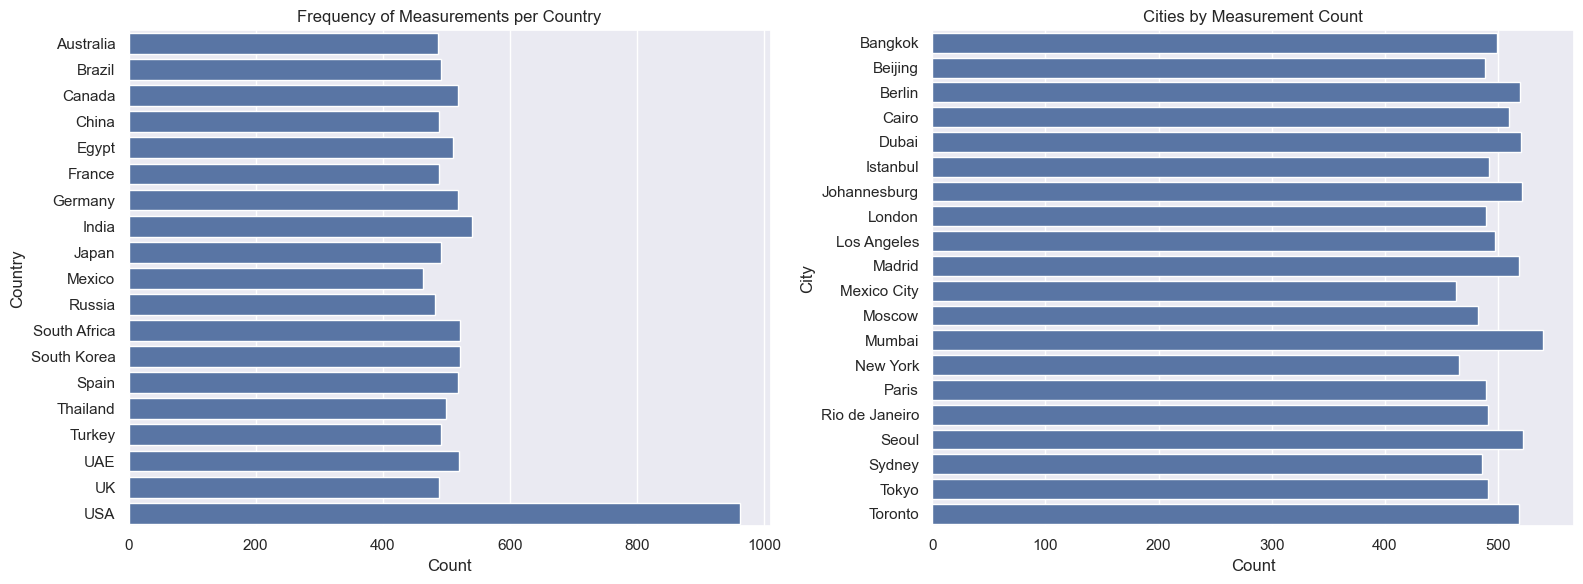

In [41]:
# Barplots for categorical variables
plt.figure(figsize=(16, 6))

# Country barplot
plt.subplot(1, 2, 1)
sns.barplot(x=country_counts.values, y=country_counts.index, orient='h')
plt.title("Frequency of Measurements per Country")
plt.xlabel("Count")
plt.ylabel("Country")

# City barplot (top 20 to avoid extremely long chart)
plt.subplot(1, 2, 2)
sns.barplot(x=city_counts.head(20).values, y=city_counts.head(20).index, orient='h')
plt.title("Cities by Measurement Count")
plt.xlabel("Count")
plt.ylabel("City")

plt.tight_layout()
plt.show()

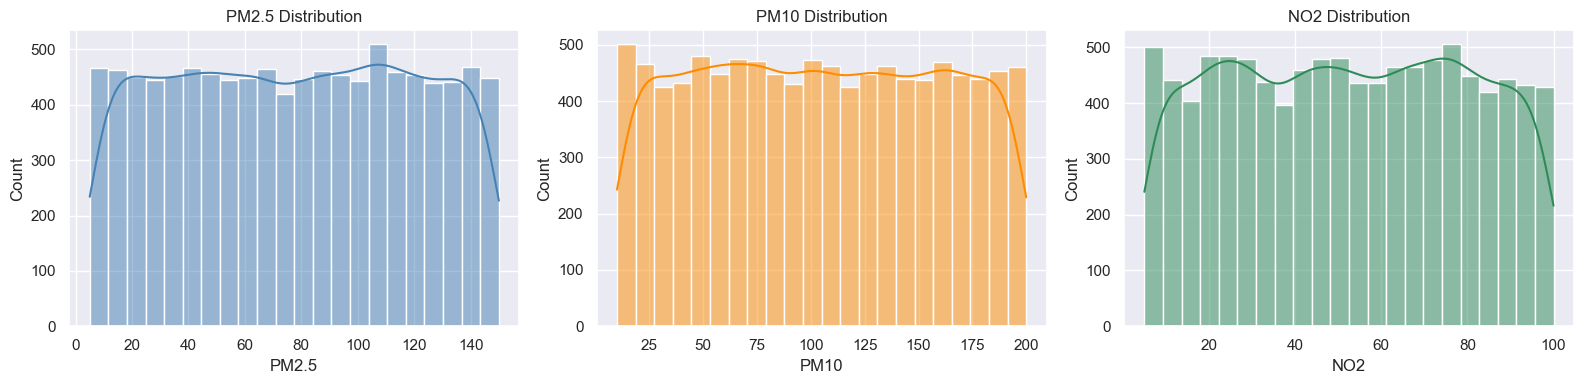

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(data=air_quality, x="PM2.5", kde=True, ax=axes[0], color='steelblue')
axes[0].set_title("PM2.5 Distribution")

sns.histplot(data=air_quality, x="PM10", kde=True, ax=axes[1], color='darkorange')
axes[1].set_title("PM10 Distribution")

sns.histplot(data=air_quality, x="NO2", kde=True, ax=axes[2], color='seagreen')
axes[2].set_title("NO2 Distribution")

plt.tight_layout()
plt.show()

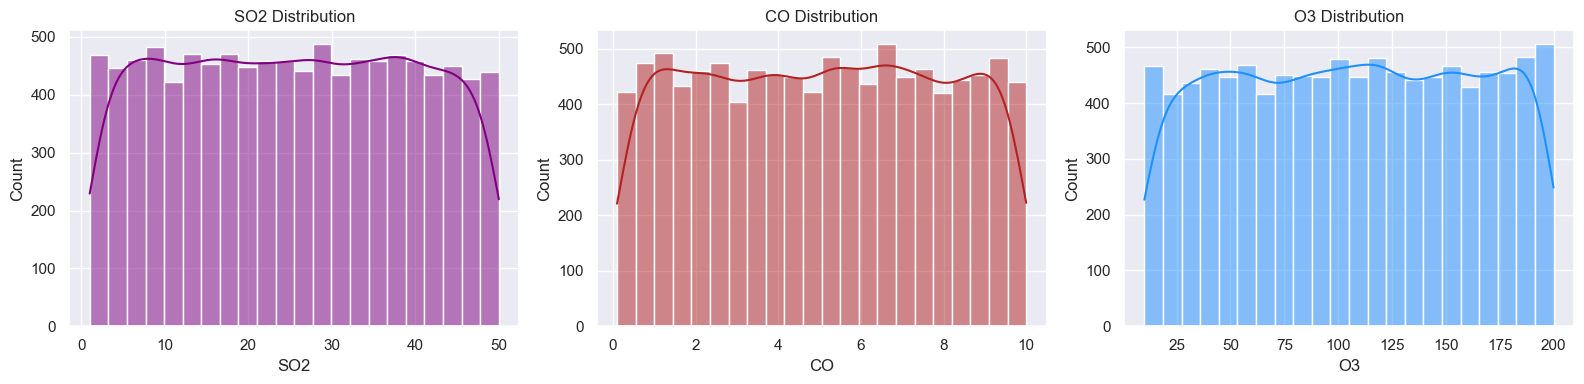

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(data=air_quality, x="SO2", kde=True, ax=axes[0], color='purple')
axes[0].set_title("SO2 Distribution")

sns.histplot(data=air_quality, x="CO", kde=True, ax=axes[1], color='firebrick')
axes[1].set_title("CO Distribution")

sns.histplot(data=air_quality, x="O3", kde=True, ax=axes[2], color='dodgerblue')
axes[2].set_title("O3 Distribution")

plt.tight_layout()
plt.show()

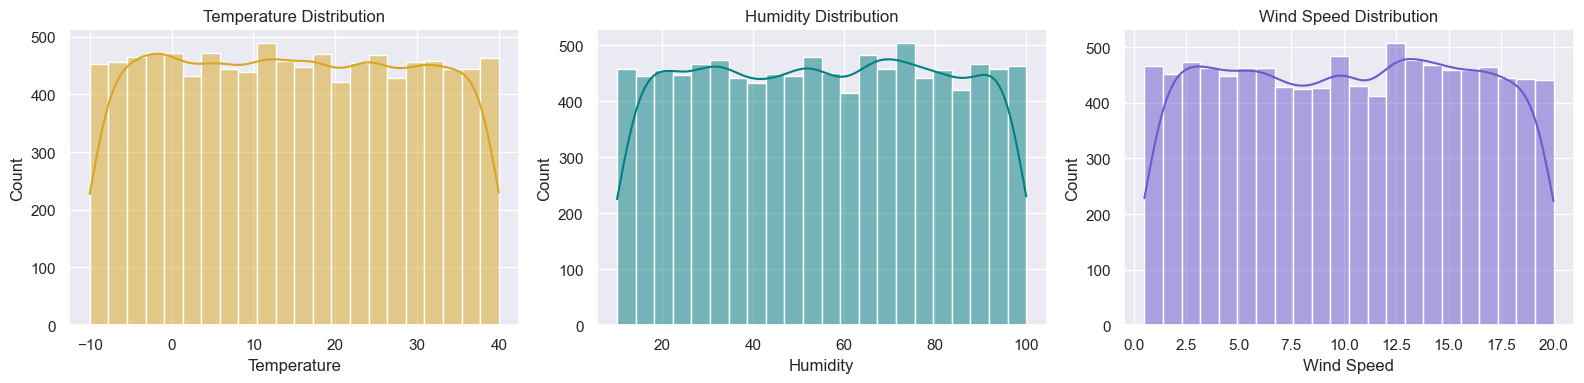

In [39]:
# --- Row 3: Temperature, Humidity, Wind Speed ---
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(data=air_quality, x="Temperature", kde=True, ax=axes[0], color='goldenrod')
axes[0].set_title("Temperature Distribution")

sns.histplot(data=air_quality, x="Humidity", kde=True, ax=axes[1], color='teal')
axes[1].set_title("Humidity Distribution")

sns.histplot(data=air_quality, x="Wind Speed", kde=True, ax=axes[2], color='slateblue')
axes[2].set_title("Wind Speed Distribution")

plt.tight_layout()
plt.show()